# CNN Improved (CIFAR-10)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

K = len(set(y_train.flatten()))
BATCH_SIZE = 32

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/30
1562/1562 [==============================] - 19s 12ms/step - loss: 1.4280 - accuracy: 0.5034 - val_loss: 1.2622 - val_accuracy: 0.5656
Epoch 2/30
1562/1562 [==============================] - 16s 11ms/step - loss: 0.9878 - accuracy: 0.6532 - val_loss: 0.9309 - val_accuracy: 0.6826
Epoch 3/30
1562/1562 [==============================] - 17s 11ms/step - loss: 0.8398 - accuracy: 0.7114 - val_loss: 0.7784 - val_accuracy: 0.7338
Epoch 4/30
1562/1562 [==============================] - 17s 11ms/step - loss: 0.7511 - accuracy: 0.7433 - val_loss: 0.6872 - val_accuracy: 0.7652
Epoch 5/30
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6783 - accuracy: 0.7689 - val_loss: 0.7738 - val_accuracy: 0.7428
Epoch 6/30
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6236 - accuracy: 0.7865 - val_loss: 0.7888 - val_accuracy: 0.7498
Epoch 7/30
1562/1562 [=============================

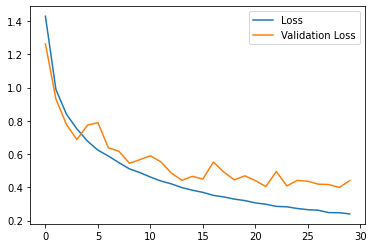

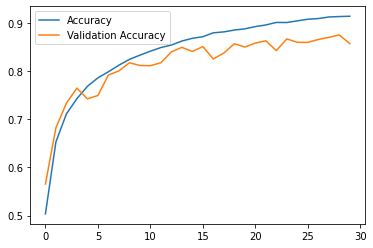

10000/10000 [==============================] - 1s 59us/sample - loss: 0.4408 - accuracy: 0.8577
Accuracy: 0.857699990272522


In [4]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, BATCH_SIZE)
steps_per_epoch = X_train.shape[0] // BATCH_SIZE

r = model.fit(train_generator,
              validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch,
              epochs=30)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

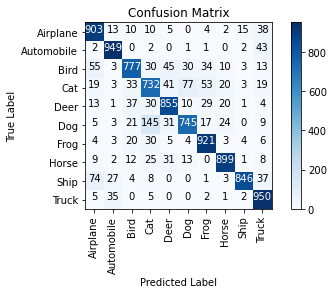

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

## Display a random misclassified image

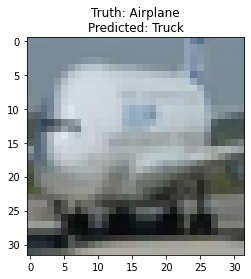

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]}\nPredicted: {labels[p_test[i]]}')
plt.show()